In [1]:
from qiskit.circuit.library import U1Gate, HGate
from qiskit import QuantumCircuit, execute, Aer, QuantumRegister, ClassicalRegister
import math
import matplotlib.pyplot as plt
from qiskit.visualization import circuit_drawer
import cmath
import time

In [2]:
def normalize(x):
    # 对输入值 x 取模，确保位于 0 到 2π 范围内
    mapped_x = x % (2* math.pi)
    # 计算原始数据超过2π的倍数
    multiplier = x // (2*math.pi)
    return mapped_x, multiplier
def denormalize(mapped_x, multiplier):
    # 使用归一化后的数据和原始数据超过2π的倍数来恢复原始数据
    x = mapped_x + multiplier * (2* math.pi)
    return x

In [3]:
float1 = 6
float2 = 12

In [4]:
import random

def random_float64(min_value, max_value):
    # 生成一个 64 位浮点数
    float_value = random.random()
    # 将浮点数乘以最大值和最小值的差，并加上最小值
    float_value = float_value * (max_value - min_value) + min_value
    return float_value

# 生成两个 64 位浮点数，并且要大于千亿
# float1 = random_float64(1000000000, 9999999999)
# float2 = random_float64(1000000000, 9999999999)

# print(float1)
# print(float2)


In [5]:
mapped_x, multiplier = normalize(float1)
print(f"Normalized value: {mapped_x}, Multiplier: {multiplier}")
mapped_y, multipliery = normalize(float2)
print(f"Normalized value: {mapped_y}, Multiplier: {multipliery}")

Normalized value: 6.0, Multiplier: 0.0
Normalized value: 5.716814692820414, Multiplier: 1.0


In [6]:
start_time = time.time()
# 创建一个量子电路
qc = QuantumCircuit(1,1)
# theta1 = float1 * (2 * math.pi) / 360  # 将角度转换为弧度
# theta2 = float2 * (2 * math.pi) / 360  # 将角度转换为弧度
theta1 = mapped_x   # 将角度转换为弧度
theta2 = mapped_y   # 将角度转换为弧度
print("Theta1 (in radians):", theta1)
print("Theta2 (in radians):", theta2)

# 在每个U1门之前添加Hadamard门
h_gate = HGate()
u1_gate1 = U1Gate(theta1)
u1_gate2 = U1Gate(theta2)

qc.append(h_gate, [0])
qc.append(u1_gate1, [0])
# qc.append(h_gate, [0])
qc.append(u1_gate2, [0])
# qc.measure_all()
qc.measure(0,0)
# 获取量子电路的状态向量
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
statevector = job.result().get_statevector(qc)

# print("Statevector:", statevector)

# Extract phase from the second component of the statevector
component = statevector[1]
phase = cmath.phase(component)

# Convert phase from radians to degrees
angle_in_degrees = phase % (2*math.pi)
output = denormalize(angle_in_degrees, multiplier+multipliery)
# print("Extracted angle (in degrees):", angle_in_degrees)
print("Extracted angle (in degrees):", output)
# 记录结束时间
end_time = time.time()
# 计算运行时间
runtime1 = end_time - start_time

Theta1 (in radians): 6.0
Theta2 (in radians): 5.716814692820414
Extracted angle (in degrees): 6.283185307179586


/var/folders/_q/vrpgvht92c9d6t6zcv7xx36m0000gn/T/ipykernel_13202/3062781807.py:23: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('statevector_simulator')
/var/folders/_q/vrpgvht92c9d6t6zcv7xx36m0000gn/T/ipykernel_13202/3062781807.py:24: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, simulator)


In [7]:
print("Runtime1 (in seconds):", runtime1)

Runtime1 (in seconds): 0.13372302055358887


In [8]:
#比较时间
start_time = time.time()
# real=float1 + float2
real = denormalize(mapped_x+mapped_y, multiplier+multipliery)
print("real:", real)
# 记录结束时间
end_time = time.time()

real: 18.0


In [9]:
# 计算运行时间
runtime2 = end_time - start_time
print("Runtime2 (in seconds):", runtime2)
print("用时比较：", runtime1-runtime2)

Runtime2 (in seconds): 0.00013375282287597656
用时比较： 0.1335892677307129


/Users/danielcrystal/work/new_env/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


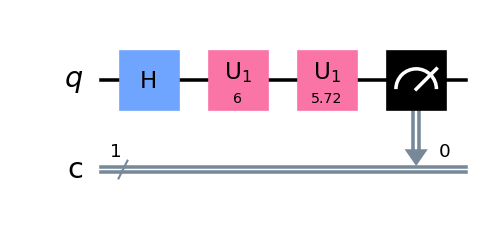

In [10]:
# 绘制电路图形
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
# 使用circuit_drawer绘制电路
circuit_drawer(qc, output='mpl', ax=ax)
plt.show()